In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../data/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'Newspaper spend')

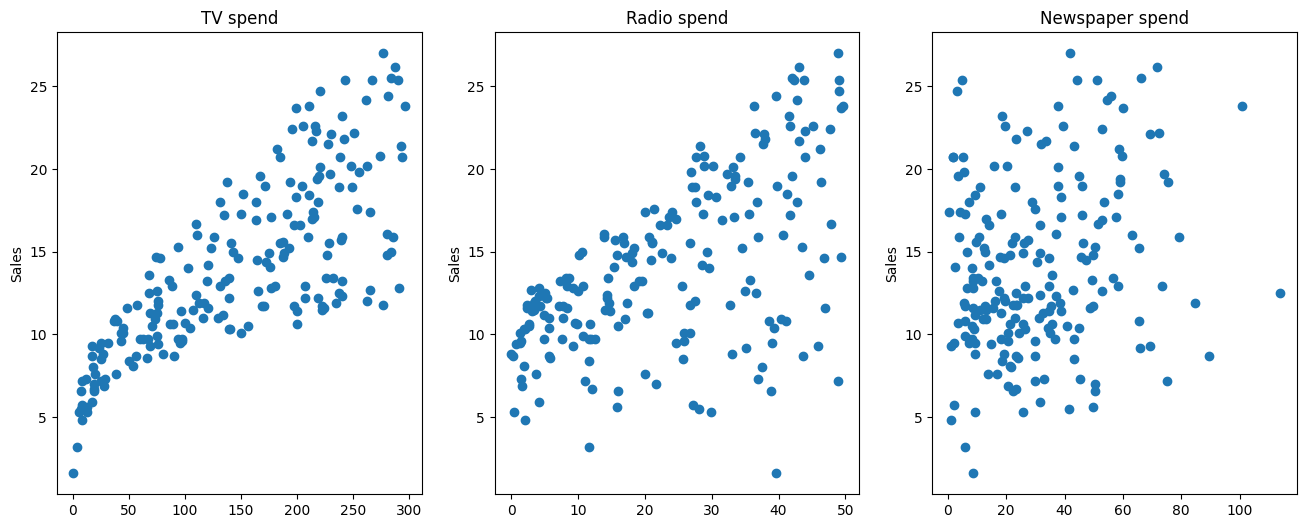

In [4]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axis[0].plot(df['TV'], df['sales'], 'o')
axis[0].set_ylabel("Sales")
axis[0].set_title("TV spend")

axis[1].plot(df['radio'], df['sales'], 'o')
axis[1].set_ylabel("Sales")
axis[1].set_title("Radio spend")

axis[2].plot(df['newspaper'], df['sales'], 'o')
axis[2].set_ylabel("Sales")
axis[2].set_title("Newspaper spend")

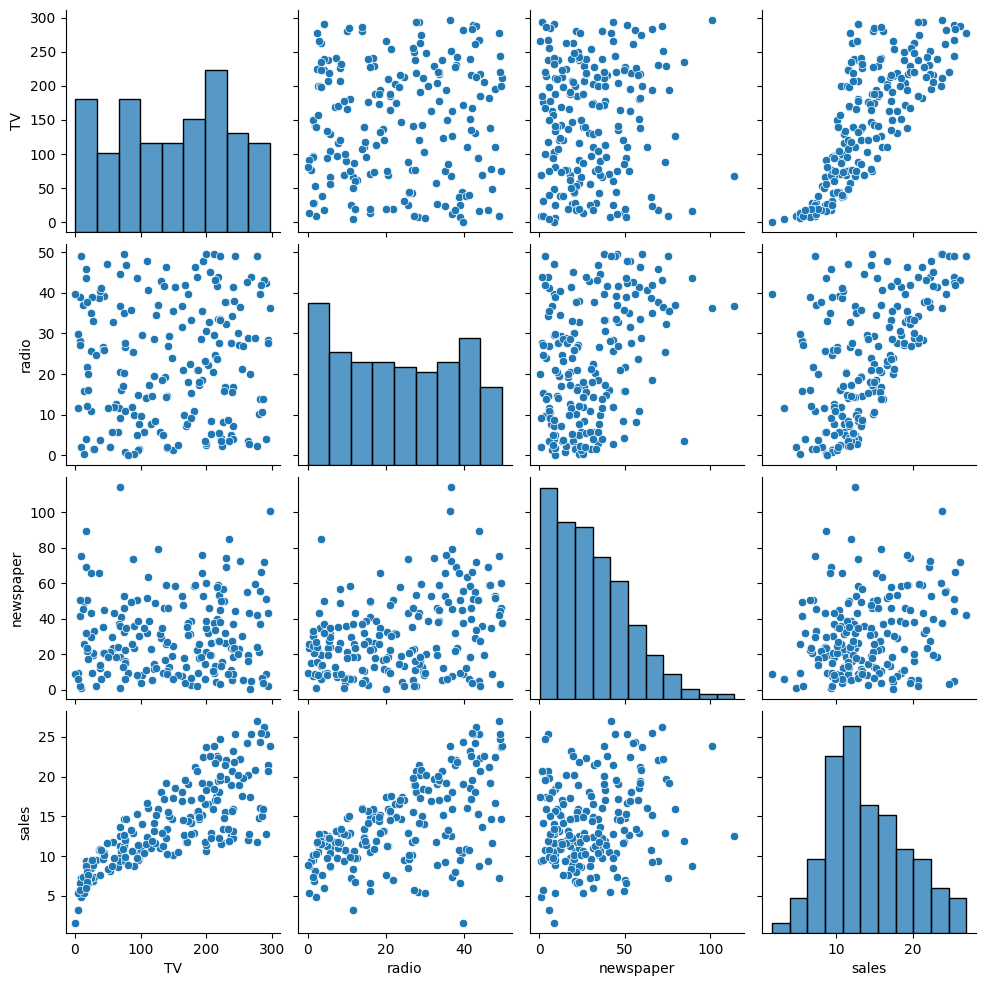

In [5]:
sns.pairplot(df)

In [6]:
X = df.drop('sales', axis=1)
y = df['sales']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (134, 3)
X_test shape:  (66, 3)
y_train shape:  (134,)
y_test shape:  (66,)


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
test_predictions = model.predict(X_test)
test_predictions

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

<Axes: xlabel='sales', ylabel='Count'>

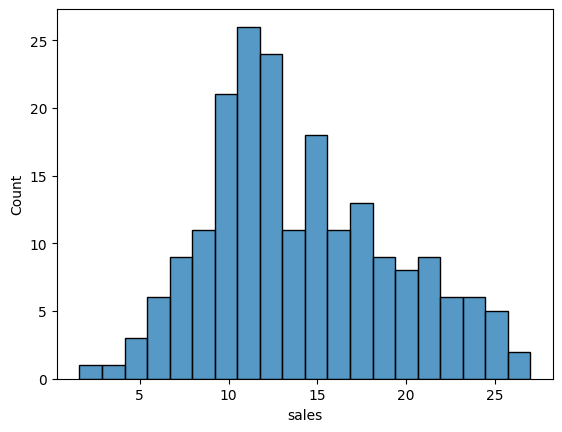

In [15]:
sns.histplot(data=df, x='sales', bins=20)

In [16]:
mean_absolute_error(y_test, test_predictions)

1.4937750024728969

In [17]:
mean_squared_error(y_test, test_predictions)

3.7279283306815096

In [18]:
# Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
rmse

1.9307843822347202

In [19]:
test_redusial = y_test - test_predictions

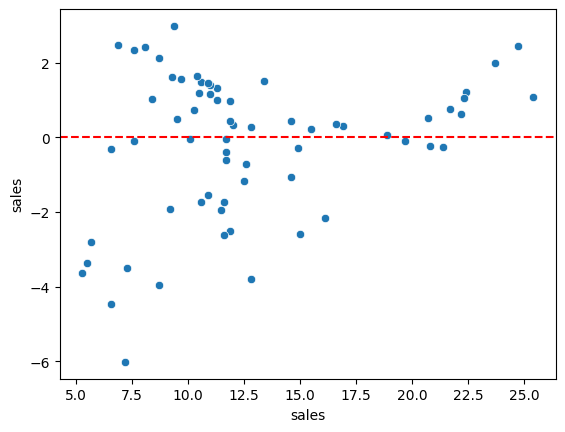

In [20]:
sns.scatterplot(x=y_test, y=test_redusial)
plt.axhline(y=0, color='red', ls='--')

In [21]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [22]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [23]:
# array([ 0.04576465,  0.18853002, -0.00103749])
# TV - radio - newspaper

X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [24]:
y_hat = final_model.predict(X)
y_hat

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

Text(0.5, 1.0, 'Newspaper spend')

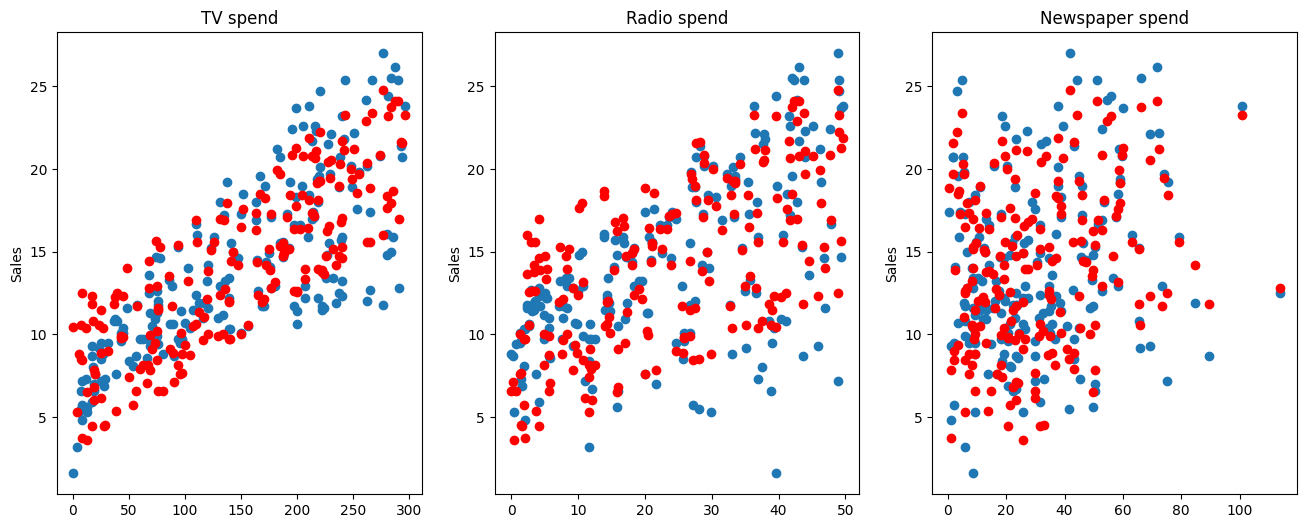

In [25]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axis[0].plot(df['TV'], df['sales'], 'o')
axis[0].plot(df['TV'], y_hat, 'o', color='red')
axis[0].set_ylabel("Sales")
axis[0].set_title("TV spend")

axis[1].plot(df['radio'], df['sales'], 'o')
axis[1].plot(df['radio'], y_hat, 'o', color='red')
axis[1].set_ylabel("Sales")
axis[1].set_title("Radio spend")

axis[2].plot(df['newspaper'], df['sales'], 'o')
axis[2].plot(df['newspaper'], y_hat, 'o', color='red')
axis[2].set_ylabel("Sales")
axis[2].set_title("Newspaper spend")

In [26]:
from joblib import dump, load

In [27]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [28]:
load_model = load('final_sales_model.joblib')

In [29]:
load_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [30]:
X.shape

(200, 3)

In [31]:
# 149 TV, 22 Radio, 12 Newspapers
campaign = [[149, 22, 12]]
load_model.predict(campaign)

/Users/kienduongtrung/Documents/Learning Space/Machine Learning/Udemy/Machine Learning Tutorials/.machineLearning/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])